<a href="https://colab.research.google.com/github/F-dat/DataAnalysisPython/blob/master/Chaniasentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 1.7MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp36-none-any.whl size=11422785 sha256=8783edc81e3870f083984cd0606bd2c2d794a63f248373229e335533809bb329
  Stored in directory: /tmp/pip-ephem-wheel-cache-o06utin5/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
from google.colab import drive
drive.mount('/gdrive')



PATH = "/gdrive/My\ Drive/Colab\ Notebooks/"
!ls {PATH}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
'03- pandas (billionaires).ipynb'
'03 - pandas intro (animals dataset).ipynb'
'2 TwitterFani Ventouri.ipynb'
 athcountries.ipynb
 bank.csv
 banknote.csv
'Beer cans-FaniVentouri.ipynb'
 Bike-Sharing-Dataset
 bluepalace.csv
 cancer.csv
 Chaniacountriesipynb.ipynb
 Chaniasentiment.ipynb
 Classwork6.ipynb
 Classwork8.ipynb
 CommAthens.ipynb
 CommChania.ipynb
'CommThs (1).ipynb'
 CommThs.ipynb
'Copy of Athens2019airport.ipynb'
'Copy of Billionaires_Classwork.ipynb'
'Copy 

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/δεδ/Καθαρα/chaniacomments.csv")
df = pd.DataFrame(df)

# Διαβάζουμε το EmoLex



In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import el_core_news_sm
nlp = el_core_news_sm.load()

In [ ]:
df

,Unnamed: 0,title,comment,date,Term
0,0,μαγεια,ένα μέρος χαλάρωσης και εξωτική ομορφιάς... αξ...,2019-10-01,αβάφτιστος
1,1,breathtaking view,έρχομαι με αυτοκίνητο κάθε χρόνο στη μαγευτική...,2020-04-01,Χριστός
2,2,ποια καραϊβική;,αν επιλέξετε την επίσκεψη με αμάξι αξίζει η τα...,2019-07-01,α
3,3,μαγευτικός μπάλος,μαγεία απλά και μονολεκτικά. ο παράδεισος του ...,2019-09-01,αβάπτιστος
4,4,paradise,καταπληκτική θέα από ψηλά αξίζει να πας με αυτ...,2019-09-01,αβεβαιότητα
...,...,...,...,...,...
2310,2310,NaN,NaN,NaN,ωραίος
2311,2311,NaN,NaN,NaN,ωρύομαι
2312,2312,NaN,NaN,NaN,ωσάν
2313,2313,NaN,NaN,NaN,ωτακουστής


In [ ]:
df.dropna(subset=['comment'], how='all', inplace=True)

In [ ]:
df.dropna(subset=['title'], how='all', inplace=True)

In [ ]:
df.isnull()

,Unnamed: 0,title,comment,date,Term
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
170,False,False,False,False,False
171,False,False,False,False,False
172,False,False,False,False,False
173,False,False,False,False,False


In [ ]:
#short_tweets = full_tweets_df[['created_at','full_text' ]]
#short_tweets = short_tweets.rename(columns={'created_at': 'data', 'full_text': 'text'} )

In [ ]:
df.dtypes

Unnamed: 0     int64
title         object
comment       object
date          object
Term          object
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].head())

0   2019-10-01
1   2020-04-01
2   2019-07-01
3   2019-09-01
4   2019-09-01
Name: date, dtype: datetime64[ns]


In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
#short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(df['comment'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(175, 13161)

In [ ]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']




In [ ]:
df.head(3)

,Unnamed: 0,title,comment,date,Term
0,0,μαγεια,ένα μέρος χαλάρωσης και εξωτική ομορφιάς... αξ...,2019-10-01,αβάφτιστος
1,1,breathtaking view,έρχομαι με αυτοκίνητο κάθε χρόνο στη μαγευτική...,2020-04-01,Χριστός
2,2,ποια καραϊβική;,αν επιλέξετε την επίσκεψη με αμάξι αξίζει η τα...,2019-07-01,α


In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
df

,Unnamed: 0,title,comment,date,Term,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,0,μαγεια,ένα μέρος χαλάρωσης και εξωτική ομορφιάς... αξ...,2019-10-01,αβάφτιστος,0,0,0,0,0,0,0,0,0,0
1,1,breathtaking view,έρχομαι με αυτοκίνητο κάθε χρόνο στη μαγευτική...,2020-04-01,Χριστός,0,2,2,1,0,2,1,0,0,0
2,2,ποια καραϊβική;,αν επιλέξετε την επίσκεψη με αμάξι αξίζει η τα...,2019-07-01,α,0,4,1,1,0,0,1,2,4,1
3,3,μαγευτικός μπάλος,μαγεία απλά και μονολεκτικά. ο παράδεισος του ...,2019-09-01,αβάπτιστος,1,0,0,2,2,0,1,2,2,1
4,4,paradise,καταπληκτική θέα από ψηλά αξίζει να πας με αυτ...,2019-09-01,αβεβαιότητα,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,πάντα ομορφο,παρά την πολυκοσμία..το ενετικό λιμάνι είναι π...,2019-07-01,αντιαμερικανικός,0,0,0,0,0,1,0,0,1,0
171,171,παλιο λιμάνι χανίων.,η πιο όμορφη ώρα για μια βολτα στο παλιο ενετι...,2019-07-01,αντιγραφέας,2,3,0,0,0,1,1,0,2,2
172,172,γοητευτικό,όμορφο ρομαντικό με πολλές επιλογές για να απο...,2019-07-01,αντιπάθεια,1,1,0,1,0,2,0,1,1,1
173,173,λιμάνι με άποψη!,από τα πιο ομορφα μέρη που επισκέφτηκα στα χαν...,2019-07-01,αντιπαθώ,0,1,0,1,0,2,0,0,0,0


In [ ]:
#short_tweets.set_index('None' , inplace=True)

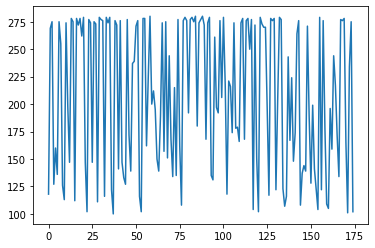

In [ ]:
df['comment'].str.len().groupby(by=df.index).mean().plot() 

In [ ]:
df['comment'].str.len().resample('A').mean().plot() 

TypeError: ignored

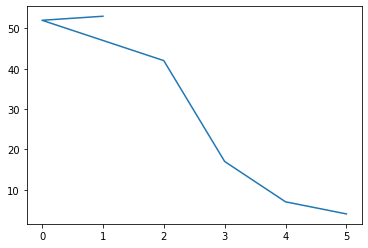

In [ ]:
df['positivity'].value_counts().plot() 

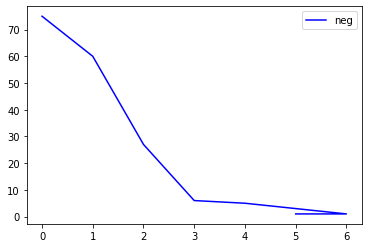

In [ ]:
df['negative'].value_counts().plot(color = 'b',label = 'neg').legend() 

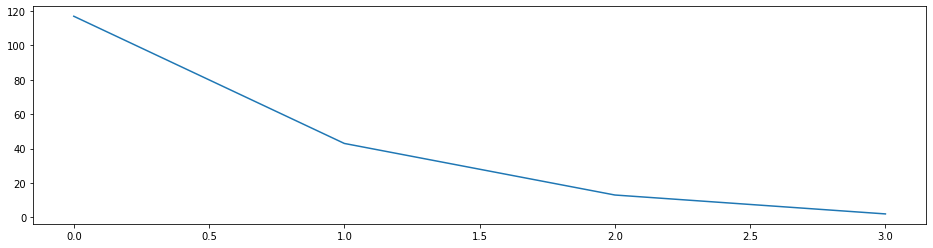

In [ ]:
df['anger'].value_counts().plot(figsize=(16,4))

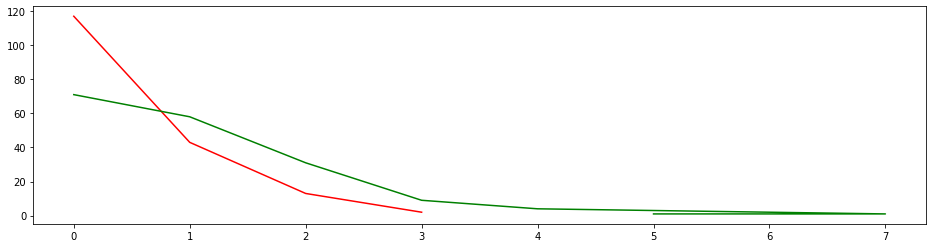

In [ ]:
ax = df['anger'].value_counts().plot(figsize=(16,4), color = 'red')
df['joy'].value_counts().plot(figsize=(16,4), ax = ax, color = 'green')

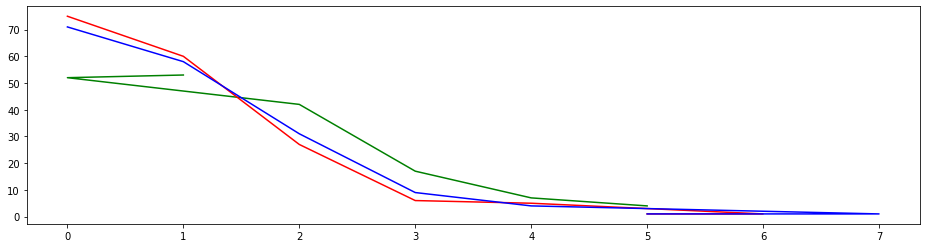

In [ ]:
ax = df['positivity'].value_counts().plot(figsize=(16,4), color = 'green')
df['negative'].value_counts().plot(figsize=(16,4), ax = ax, color = 'red')
df['joy'].value_counts().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

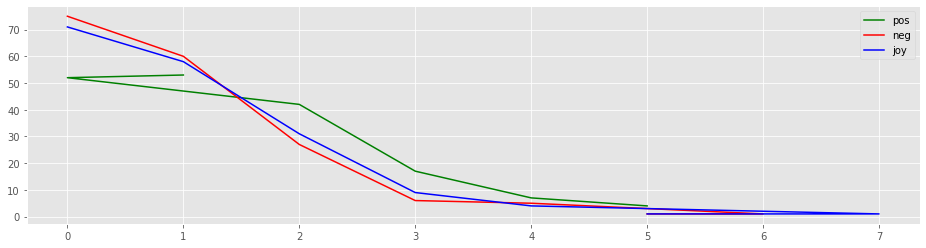

In [ ]:
ax = df['positivity'].value_counts().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
df['negative'].value_counts().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
df['joy'].value_counts().plot(figsize=(16,4), ax = ax, 
                                                label = 'joy',color = 'blue').legend()